In [464]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import plotly
plt.style.use('ggplot')

In [64]:
majestic_df = pd.read_csv('majestic6.csv', header=None)

In [65]:
majestic_df.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [66]:
next_df = pd.read_csv('majestic7.csv', header=None)
next_df.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [67]:
majestic_df = pd.concat([majestic_df, next_df], ignore_index=True)

In [68]:
next2 = pd.read_csv('majestic10.csv', header=None)
next2.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [69]:
majestic_df = pd.concat([majestic_df, next2], ignore_index=True)

In [70]:
next3 = pd.read_csv('majestic11.csv', header=None)
next3.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [71]:
majestic_df = pd.concat([majestic_df, next3], ignore_index=True)

In [72]:
next4 = pd.read_csv('majestic12.csv', header=None)
next4.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [73]:
majestic_df = pd.concat([majestic_df, next4], ignore_index=True)

In [75]:
majestic_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [77]:
columnTitles=['Name', 'Country', 'Type', 'Style', 'Grape', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Closure', 'ABV', 'Units', 'Volume']

In [78]:
majestic_df=majestic_df.reindex(columns=columnTitles)

In [124]:
majestic_df.to_csv('majestic_df.csv', encoding='utf-8', index=False)

In [189]:
copy = majestic_df.copy()

In [194]:
copy['Mix Six Price'] = pd.to_numeric(copy['Mix Six Price'])

In [199]:
copy['Savings'] = copy['Per Bottle Price']-copy['Mix Six Price']

In [201]:
copy['Percent Saved'] = round(copy['Savings']/copy['Per Bottle Price']*100, 0)

In [203]:
majestic_df['Mix Six Price'] = pd.to_numeric(majestic_df['Mix Six Price'])

In [204]:
majestic_df['Savings'] = majestic_df['Per Bottle Price']-majestic_df['Mix Six Price']

In [205]:
majestic_df['Percent Saved'] = round(majestic_df['Savings']/majestic_df['Per Bottle Price']*100, 0)

In [415]:
copy['price_for_75cl'] = (copy['Per Bottle Price']/copy['Volume'])*75

In [416]:
majestic_df['price_for_75cl'] = (majestic_df['Per Bottle Price']/majestic_df['Volume'])*75

,Name,Country,Type,Style,Grape,Short Description,Long Description,Per Bottle Price,Mix Six Price,Percentage of reviewers who would buy again,...,Awards,Closure,ABV,Units,Volume,Savings,Percent Saved,price_per_cl,price_for_75cl,awards_num
0,"Bread & Butter Chardonnay 2017, California",USA,White,Rich White,NaN,OFF DRY,"Complex and layered, with distinctive notes of...",15.99,10.99,91.0,...,0,Natural Cork,13.5%,10.1,75.0,5.0,31.0,0.213200,15.99,0
1,"Nero Oro Appassimento 2018, Sicily",Italy,Red,Big Red,NaN,FULL,Nero Oro is made by a winemaker who's scored a...,9.99,6.99,93.0,...,"['IWC 2019 - Commended Award', 'Decanter 2019 ...",NaN,14%,10.1,75.0,3.0,30.0,0.133200,9.99,"['IWC 2019 - Commended Award', 'Decanter 2019 ..."
2,"Jaboulet Viognier 2018, France",France,White,Fruity White,NaN,DRY,"When this was a WIGIG (when it's gone, it's go...",11.99,7.99,91.0,...,0,NaN,12.5%,9.8,75.0,4.0,33.0,0.159867,11.99,0
3,"Dawn Star Sauvignon Blanc 2018, Marlborough",New Zealand,White,Fruity White,NaN,DRY,New Zealand's vines are the very first to gree...,9.99,6.99,92.0,...,0,NaN,13%,9.8,75.0,3.0,30.0,0.133200,9.99,0
4,"Definition Zinfandel 2017, Lodi",USA,Red,Big Red,NaN,FULL,The Definition range captures the quintessenti...,9.99,7.99,97.0,...,"['IWC 2019 - Bronze Award', 'IWC 2018 - Commen...",NaN,14%,10.9,75.0,2.0,20.0,0.133200,9.99,"['IWC 2019 - Bronze Award', 'IWC 2018 - Commen..."


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

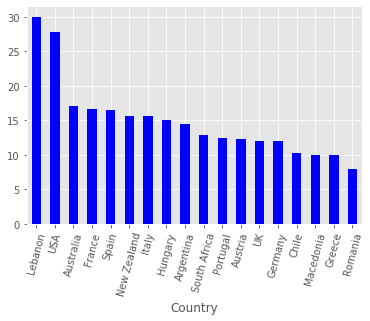

In [543]:
# Just 5 from Lebanon
copy.groupby('Country')['Per Bottle Price'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.xticks(rotation=75)

In [233]:
outliers = majestic_df[['Per Bottle Price']]
outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

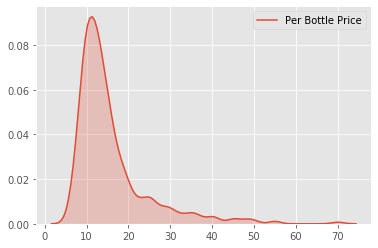

In [234]:
sns.kdeplot(outliers['Per Bottle Price'], shade=True)

Text(0.5, 1.0, 'Price by Wine Type')

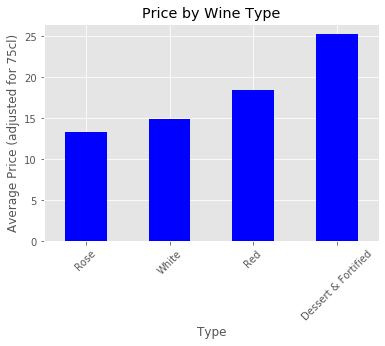

In [580]:
copy.groupby('Type')['price_for_75cl'].mean().sort_values(ascending=True).plot.bar(color = 'b')
plt.ylabel('Average Price (adjusted for 75cl)')
plt.xticks(rotation=45)
plt.title('Price by Wine Type')

Text(0.5, 1.0, 'Price Distribution for Red and White Wine')

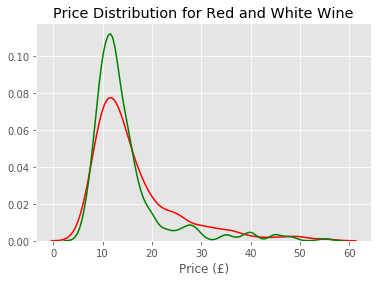

In [534]:
type_red = copy[copy['Type']=='Red']
type_white = copy[copy['Type']=='White']

type_red_cut = type_red[type_red['Per Bottle Price']<60]
type_white_cut = type_white[type_white['Per Bottle Price']<60]

sns.distplot(type_red_cut[['Per Bottle Price']], hist=False, color='r')
sns.distplot(type_white_cut[['Per Bottle Price']], hist=False, color='g')
plt.xlabel('Price (£)')
plt.title('Price Distribution for Red and White Wine')


In [ ]:
#outliers = majestic_df[['Per Bottle Price']]
#outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [515]:
#WineGrid = sns.FacetGrid(copy[copy['Per Bottle Price']<60], col='Type', hue='Type', palette="Set2")
#WineGrid.map(sns.distplot, 'Per Bottle Price')

Text(0, 0.5, 'Bottles')

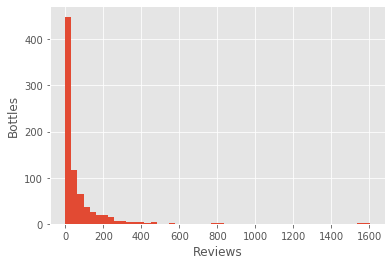

In [562]:
### Masses never reveiwed

plt.hist(copy['Number of Reviewers'], bins=50)
plt.xlabel('Reviews')
plt.ylabel('Bottles')

In [257]:
not_enough = copy
not_enough = not_enough[not_enough['Short Description'] != 'FRANCE']
not_enough = not_enough[not_enough['Short Description'] != 'SPAIN']
not_enough = not_enough[not_enough['Short Description'] != 'ITALY']
not_enough = not_enough[not_enough['Short Description'] != 'CHILE']

Text(0.5, 1.0, 'Red Prices by Description')

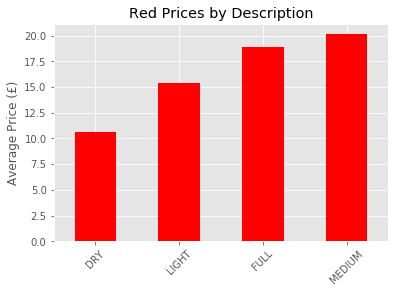

In [551]:
### Price averages for Red Wine

not_enough[not_enough['Type']=='Red'].groupby('Short Description')['Per Bottle Price'].mean().sort_values(ascending=True).plot.bar(color='r')
plt.ylabel('Average Price (£)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Red Prices by Description')

Text(0.5, 1.0, 'Red Prices by Style')

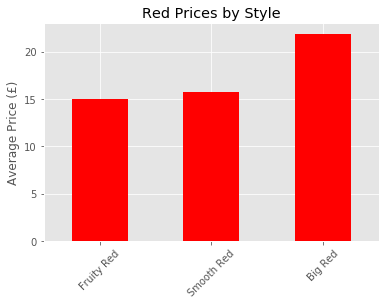

In [550]:
copy[copy['Type']=='Red'].groupby('Style')['Per Bottle Price'].mean().sort_values(ascending=True).plot.bar(color='r')
plt.xlabel('')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.title('Red Prices by Style')

Text(0, 0.5, '% who would buy again')

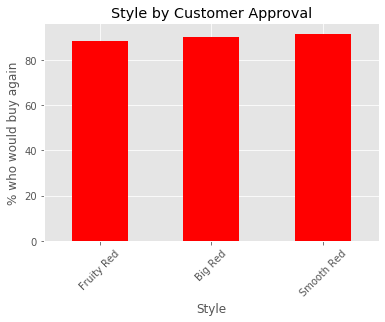

In [559]:
reviewer_subset[reviewer_subset['Type']=='Red'].groupby('Style')['Percentage of reviewers who would buy again'].mean().sort_values(ascending=True).plot.bar(color='r')
plt.title('Style by Customer Approval')
plt.xticks(rotation=45)
plt.ylabel('% who would buy again')

In [268]:
not_whi = copy
not_whi = not_whi[not_whi['Short Description'] != 'PORTUGAL']
not_whi = not_whi[not_whi['Short Description'] != 'HUNGARY']
not_whi = not_whi[not_whi['Short Description'] != 'NEW ZEALAND']
not_whi = not_whi[not_whi['Short Description'] != 'FRANCE']

Text(0.5, 1.0, 'White Prices by Description')

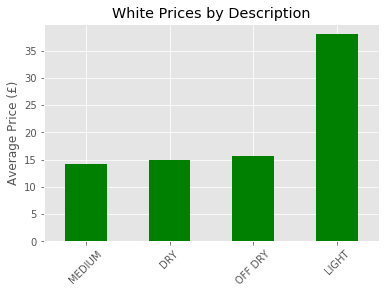

In [549]:
### Price avgs for White
not_whi[not_whi['Type']=='White'].groupby('Short Description')['Per Bottle Price'].mean().sort_values(ascending=True).plot.bar(color='g')
plt.ylabel('Average Price (£)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('White Prices by Description')








Text(0.5, 1.0, 'White Prices by Style')

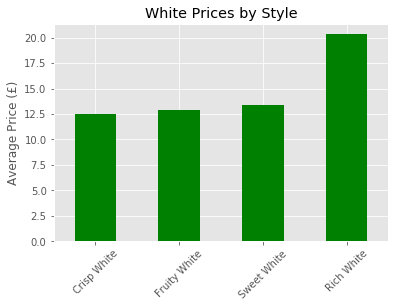

In [553]:
copy[copy['Type']=='White'].groupby('Style')['Per Bottle Price'].mean().sort_values(ascending=True).plot.bar(color='g')
plt.xlabel('')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.title('White Prices by Style')






Text(0, 0.5, '% who would buy again')

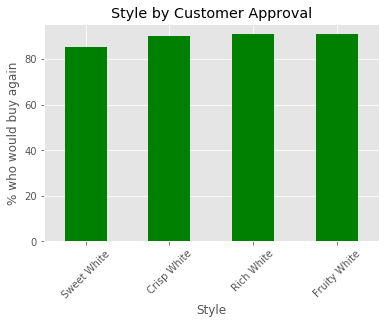

In [557]:
reviewer_subset[reviewer_subset['Type']=='White'].groupby('Style')['Percentage of reviewers who would buy again'].mean().sort_values(ascending=True).plot.bar(color='g')
plt.title('Style by Customer Approval')
plt.xticks(rotation=45)
plt.ylabel('% who would buy again')

In [291]:
copy['Number of Reviewers'] = copy['Number of Reviewers'].fillna(0)
majestic_df['Number of Reviewers'] = majestic_df['Number of Reviewers'].fillna(0)

In [357]:
copy = copy.replace({'1,565':'1565'})

In [360]:
copy = copy.replace({'1,601':'1601'})

In [362]:
majestic_df = majestic_df.replace({'1,565':'1565'})

In [363]:
majestic_df = majestic_df.replace({'1,601':'1601'})

In [368]:
majestic_df['Number of Reviewers'] = pd.to_numeric(majestic_df['Number of Reviewers'])

In [367]:
copy['Number of Reviewers'] = pd.to_numeric(copy['Number of Reviewers'])


In [ ]:
reviewer_subset = copy[copy['Number of Reviewers']>40]

In [581]:
import plotly.express as px
fig = px.scatter(reviewer_subset, x=reviewer_subset['Number of Reviewers'], y=reviewer_subset['Percentage of reviewers who would buy again'], hover_name=reviewer_subset['Name'])
fig.show()

Text(0.5, 1.0, 'Cork Premium')

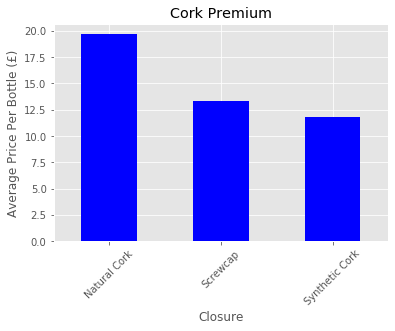

In [570]:
copy.groupby('Closure')['price_for_75cl'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Average Price Per Bottle (£)')
plt.xticks(rotation = 45)
plt.title('Cork Premium')








### only 5 with synthetic corks


In [576]:
x = copy[copy['Awards']!=0]
y = copy[copy['Awards']==0]

In [579]:
#sns.distplot(x[['Percentage of reviewers who would buy again']], hist=False, color='r')
#sns.distplot(y[['Percentage of reviewers who would buy again']], hist=False, color='g')
#plt.xlabel('Price (£)')
#plt.title('Price Distribution for Red and White Wine')